### Project Deliverable #5
##### Elise Rust
##### ANLY 555
##### Advanced Algorithms
##### December 2022

In [1]:
# Approved libraries
import csv
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import os
from datetime import datetime
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import scipy.spatial
from scipy.stats import mode

In [2]:
# Change the current working directory to the root of the Repository
import os
os.chdir('..')
print(os.getcwd())

/Users/eliserust/Desktop/Papers/Georgetown/Fall 2022/ANLY555/555_project


In [3]:
# Import classes
from data_classes import QuantDataSet, TextDataSet, HeterogeneousDataSet
from classifiers import simpleKNNClassifier
from tree_node import *

#### Test HeterogeneousDataSet class

In [4]:
# Define the DataClasses we want to include in the collection of dataclasses
data_objs = [QuantDataSet, TextDataSet]
# Define the filenames for each DataClass
filenames = ['data/quant_data.csv', 'data/text_data.csv']

# Instantiate an object of class HeterogeneousDataSet
h_data = HeterogeneousDataSet(data_objs, filenames)
print(h_data.DataSetNames)
print(h_data.filenames)

[<class 'data_classes.QuantDataSet'>, <class 'data_classes.TextDataSet'>]
['data/quant_data.csv', 'data/text_data.csv']


In [5]:
## Test the 'load()' method of the Heterogeneous DataSet Class
# This method calls individual load methods for each DataSet Class and compiles the resulting data into a list
h_data.load_datasets()

The list of filenames are:  ['data/quant_data.csv', 'data/text_data.csv']
Loading DataSets requires user input. Please print the filenames one by one in sequence when prompted


[{'Product_Code': ['P1',
   'P2',
   'P3',
   'P4',
   'P5',
   'P6',
   'P7',
   'P8',
   'P9',
   'P10',
   'P11',
   'P12',
   'P13',
   'P14',
   'P15',
   'P16',
   'P17',
   'P18',
   'P19',
   'P20',
   'P21',
   'P22',
   'P23',
   'P24',
   'P25',
   'P26',
   'P27',
   'P28',
   'P29',
   'P30',
   'P31',
   'P32',
   'P33',
   'P34',
   'P35',
   'P36',
   'P37',
   'P38',
   'P39',
   'P40',
   'P41',
   'P42',
   'P43',
   'P44',
   'P45',
   'P46',
   'P47',
   'P48',
   'P49',
   'P50',
   'P51',
   'P52',
   'P53',
   'P54',
   'P55',
   'P56',
   'P57',
   'P58',
   'P59',
   'P60',
   'P61',
   'P62',
   'P63',
   'P64',
   'P65',
   'P66',
   'P67',
   'P68',
   'P69',
   'P70',
   'P71',
   'P72',
   'P73',
   'P74',
   'P75',
   'P76',
   'P77',
   'P78',
   'P79',
   'P80',
   'P81',
   'P82',
   'P83',
   'P84',
   'P85',
   'P86',
   'P87',
   'P88',
   'P89',
   'P90',
   'P91',
   'P92',
   'P93',
   'P94',
   'P95',
   'P96',
   'P97',
   'P98',
   'P99',
   

In [6]:
# Print DataSet objects too
print(h_data.DataSetObjects)

[<data_classes.QuantDataSet object at 0x103908850>, <data_classes.TextDataSet object at 0x1038ccfd0>]


In [39]:
### Test the clean() method for the Heterogeneous DataSet Class
h_data.clean() # Call clean() method

## Print results of cleaning
h_data.data[0] # Selecting the output of the quantitative data cleaning
h_data.data[1] # This selects the output of the text cleaning --> which really illustrates the data cleaning

[{'business_id': '9yKzy9PApeiPPOUJEtnvkg',
  'date': '1/26/11',
  'review_id': 'fWKvX83p0-ka4JS3dc6E5A',
  'stars': '5',
  'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAn

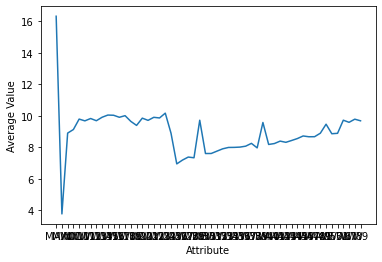

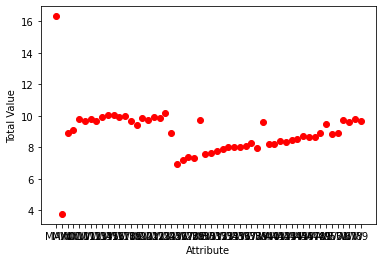

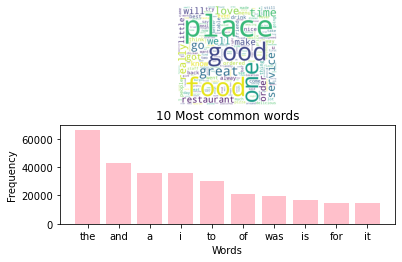

In [30]:
# Test explore() method for the Heterogeneous DataSet Class
h_data.explore()

In [7]:
## Test new select(self, class) method to select one of the constituent datasets!

# 1) View dataset options to choose from!
h_data.DataSetNames

[data_classes.QuantDataSet, data_classes.TextDataSet]

In [8]:
## 2) We want ot see Text Data so we input data_classes.TextDataSet as our key
h_data.select(TextDataSet)

The list of filenames are:  ['data/quant_data.csv', 'data/text_data.csv']
Loading DataSets requires user input. Please print the filenames one by one in sequence when prompted


[data_classes.TextDataSet]

In [15]:
## To make sure subsetting worked --> let's print some member attributes again
print("Subsetted dataset names", h_data.DataSetNames)
print("Subsetted dataset objects", h_data.DataSetObjects)
print("Subsetted data: ")
h_data.data

Subsetted dataset names [<class 'data_classes.TextDataSet'>]
Subsetted dataset objects [<data_classes.TextDataSet object at 0x12d1da670>]
Subsetted data: 


[[{'business_id': '9yKzy9PApeiPPOUJEtnvkg',
   'date': '1/26/11',
   'review_id': 'fWKvX83p0-ka4JS3dc6E5A',
   'stars': '5',
   'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\

#### Note: I was working on a kdTreeKNN Classifier as well (and the code I came up with is included in classifier.py and on the UML site) but couldn't get it functional in the timeframe. I will continue working on it on my own time!